In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
dataset = pd.read_csv('aqi.csv')

In [52]:
dataset.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [54]:
dataset.shape

(16695, 14)

In [55]:
dataset.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [56]:
columns_to_drop = ['Country', 'City', 'NO2 AQI Value', 'NO2 AQI Category']
dataset = dataset.drop(columns_to_drop, axis=1)

In [57]:
import matplotlib.pyplot as plt

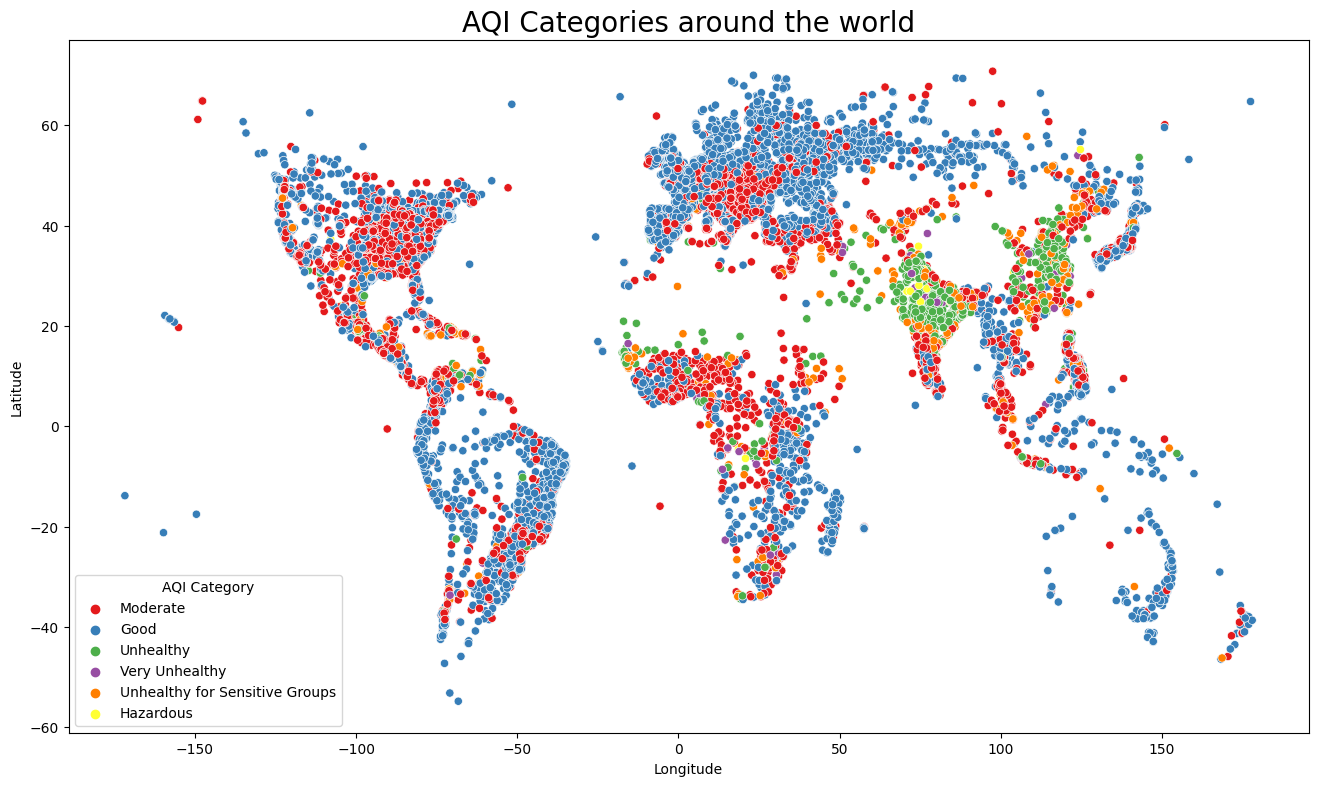

In [58]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=dataset,x='lng',y='lat',hue='AQI Category',palette='Set1')
plt.title('AQI Categories around the world',fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [59]:
import seaborn as sns

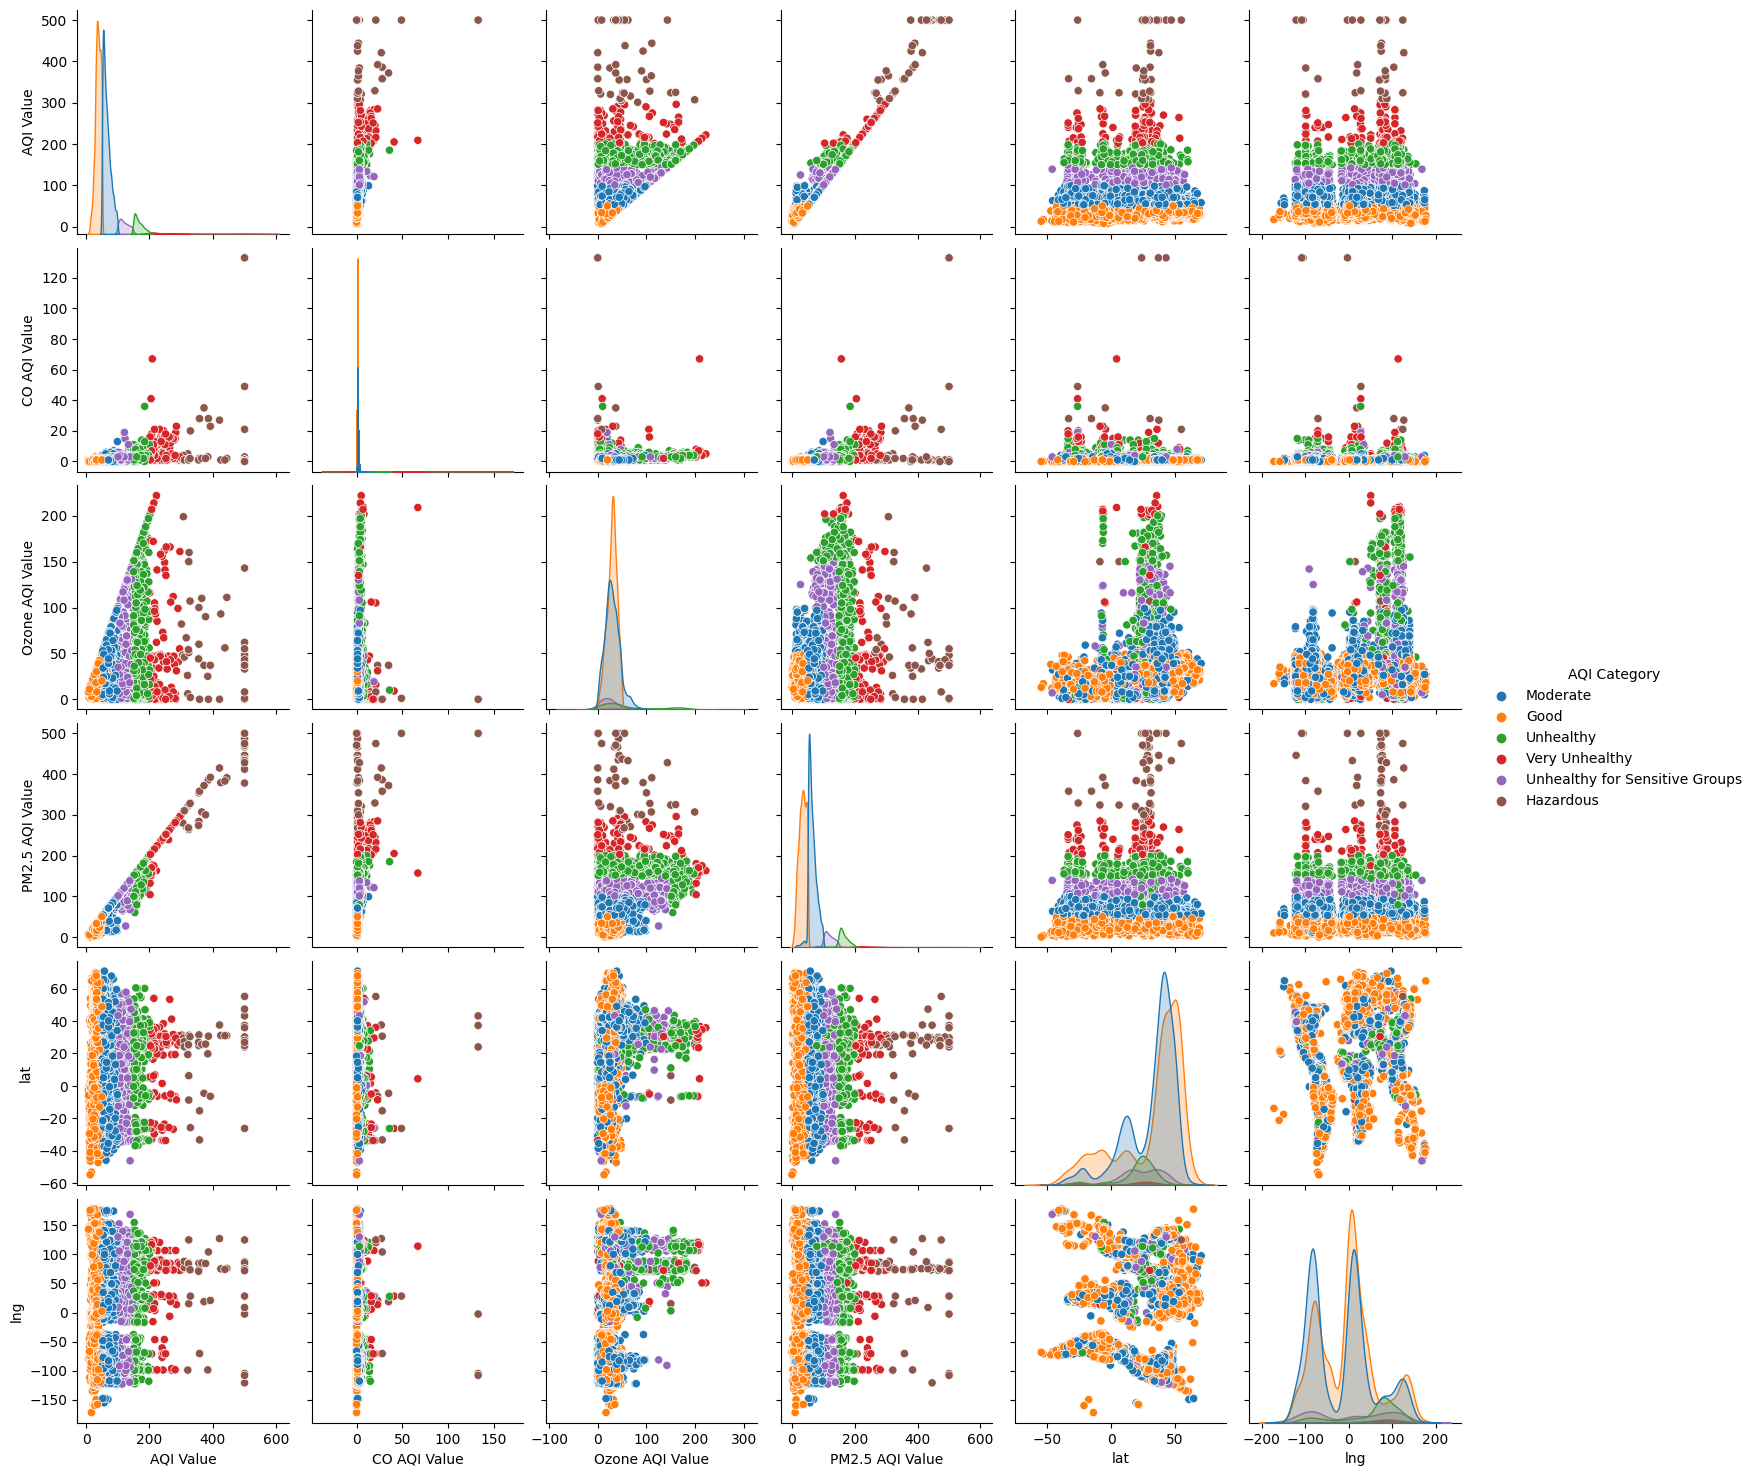

In [60]:
sns.pairplot(dataset,hue='AQI Category')
plt.show() #Data Visualization

<ipython-input-66-eab1781b41e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr = dataset.corr()


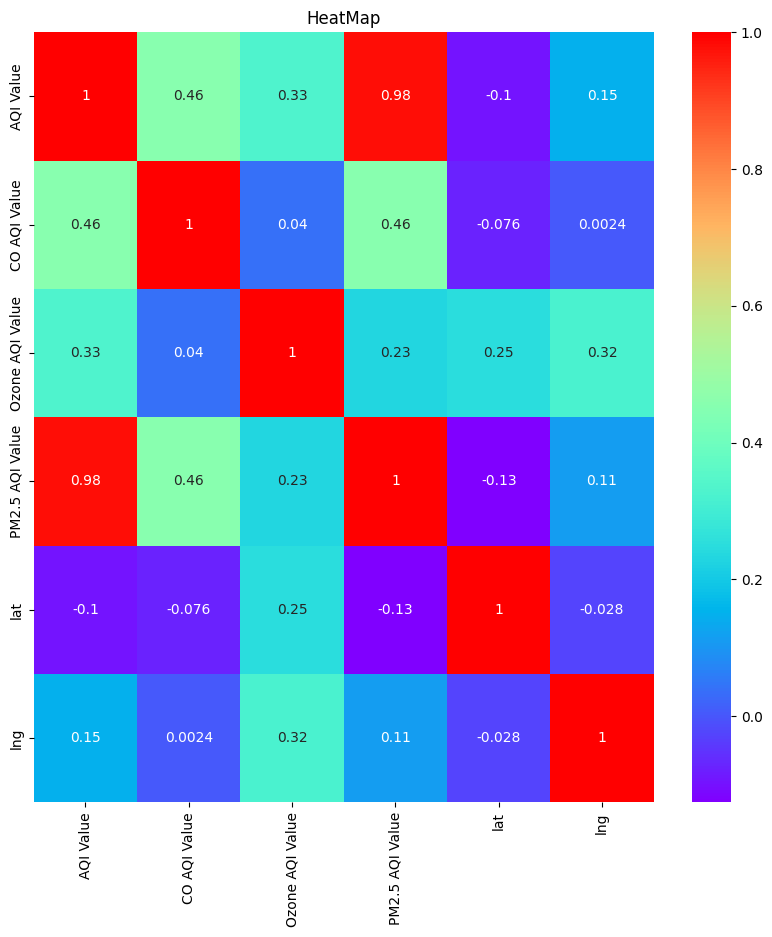

In [66]:
Corr = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr,annot=True,cmap='rainbow')
plt.title('HeatMap')
plt.show()

In [61]:
features = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']
target = 'AQI Category'

In [62]:
X = dataset[features]
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [64]:
y_pred = model.predict(X_test)
print(y_pred)

['Good' 'Unhealthy' 'Unhealthy' ... 'Unhealthy for Sensitive Groups'
 'Very Unhealthy' 'Good']


In [65]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Accuracy:', accuracy*100)
print('Classification Report:')
print(report)

Accuracy: 100.0
Classification Report:
                                precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1569
                     Hazardous       1.00      1.00      1.00         9
                      Moderate       1.00      1.00      1.00      1431
                     Unhealthy       1.00      1.00      1.00       158
Unhealthy for Sensitive Groups       1.00      1.00      1.00       147
                Very Unhealthy       1.00      1.00      1.00        25

                      accuracy                           1.00      3339
                     macro avg       1.00      1.00      1.00      3339
                  weighted avg       1.00      1.00      1.00      3339

